<a href="https://colab.research.google.com/github/thippeshms/thippeshms/blob/main/Titanic_Passengers_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df = df.drop(['PassengerId','Name','SibSp','Ticket','Cabin','Embarked'],axis=1)

In [ ]:
df

,Survived,Pclass,Sex,Age,Parch,Fare
0,0,3,male,34.5,0,7.8292
1,1,3,female,47.0,0,7.0000
2,0,2,male,62.0,0,9.6875
3,0,3,male,27.0,0,8.6625
4,1,3,female,22.0,1,12.2875
...,...,...,...,...,...,...
413,0,3,male,NaN,0,8.0500
414,1,1,female,39.0,0,108.9000
415,0,3,male,38.5,0,7.2500
416,0,3,male,NaN,0,8.0500


In [ ]:
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
Parch        0
Fare         1
dtype: int64

In [ ]:
df.Age=df['Age'].fillna(df['Age'].mean())
df.Fare=df['Fare'].fillna(df['Fare'].mean())

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Parch       0
Fare        0
dtype: int64

In [ ]:
df.replace({'Sex':{'male':0,'female':1}},inplace=True)
df

,Survived,Pclass,Sex,Age,Parch,Fare
0,0,3,0,34.50000,0,7.8292
1,1,3,1,47.00000,0,7.0000
2,0,2,0,62.00000,0,9.6875
3,0,3,0,27.00000,0,8.6625
4,1,3,1,22.00000,1,12.2875
...,...,...,...,...,...,...
413,0,3,0,30.27259,0,8.0500
414,1,1,1,39.00000,0,108.9000
415,0,3,0,38.50000,0,7.2500
416,0,3,0,30.27259,0,8.0500


In [ ]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
x_train.shape

(334, 5)

In [ ]:
x_test.shape

(84, 5)

In [ ]:
y_train.shape

(334,)

In [ ]:
y_test.shape

(84,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
dt.predict([[3,0,34.50000,0,7.8292]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
dt.score(x_train,y_train)

1.0

[Text(0.5, 0.75, 'x[1] <= 0.5\ngini = 0.47\nsamples = 334\nvalue = [208, 126]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 208\nvalue = [208, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 126\nvalue = [0, 126]')]

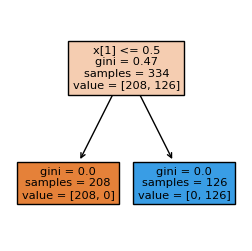

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
tree.plot_tree(dt,filled=True)